<a href="https://colab.research.google.com/github/AntoniKingston/PyTorchCourse/blob/main/02_PyTorch_Neural_Network_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.5/961.5 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 99.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 78.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 86.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torchmetrics
import sklearn

# 1.


In [15]:
X, y = sklearn.datasets.make_moons(n_samples=1000, noise=0.1, random_state=42)
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

# 2.

In [16]:
class ModelEx2(torch.nn.Module):
    def __init__(self):
        super(ModelEx2, self).__init__()
        self.fc1 = torch.nn.Linear(2, 10)
        self.act1 = torch.nn.Tanh()
        self.fc2 = torch.nn.Linear(10, 10)
        self.act2 = torch.nn.Tanh()
        self.fc3 = torch.nn.Linear(10, 1)
    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
        return x

# 3.

In [17]:
loss_function = torch.nn.BCEWithLogitsLoss()
model = ModelEx2()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

# 4.

In [18]:
accuracy = torchmetrics.classification.BinaryAccuracy(threshold = 0.5)
for epoch in range(2000):
    optimizer.zero_grad()
    y_train_pred = model(X_train)
    y_test_pred = model(X_test)


    train_loss = loss_function(y_train_pred, y_train.unsqueeze(1))
    test_loss = loss_function(y_test_pred, y_test.unsqueeze(1))

    train_loss.backward()

    if epoch % 100 == 0:
        print(f"Epoch: {epoch}")
        print(f"Train loss: {train_loss.item()}, Train accuracy: {accuracy(y_train_pred, y_train.unsqueeze(1)).item()}")
        print(f"Test loss: {test_loss.item()}, Test accuracy: {accuracy(y_test_pred, y_test.unsqueeze(1)).item()}")

    optimizer.step()


Epoch: 0
Train loss: 0.7463256120681763, Train accuracy: 0.4975000023841858
Test loss: 0.739433228969574, Test accuracy: 0.49000000953674316
Epoch: 100
Train loss: 0.34095025062561035, Train accuracy: 0.8387500047683716
Test loss: 0.3562619090080261, Test accuracy: 0.8149999976158142
Epoch: 200
Train loss: 0.27102747559547424, Train accuracy: 0.8812500238418579
Test loss: 0.26806044578552246, Test accuracy: 0.8650000095367432
Epoch: 300
Train loss: 0.2635590732097626, Train accuracy: 0.8824999928474426
Test loss: 0.25687360763549805, Test accuracy: 0.8849999904632568
Epoch: 400
Train loss: 0.2599213421344757, Train accuracy: 0.8849999904632568
Test loss: 0.25289177894592285, Test accuracy: 0.8949999809265137
Epoch: 500
Train loss: 0.25503113865852356, Train accuracy: 0.887499988079071
Test loss: 0.2481110394001007, Test accuracy: 0.9049999713897705
Epoch: 600
Train loss: 0.24438175559043884, Train accuracy: 0.8962500095367432
Test loss: 0.2368617206811905, Test accuracy: 0.904999971389

# 5.

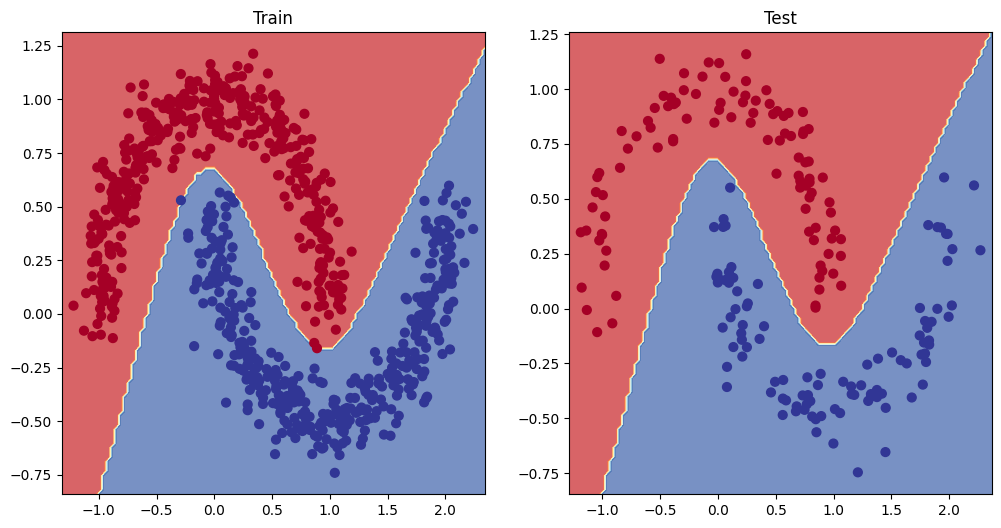

In [19]:
def plot_decision_boundary(model, X, y):

    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Source - https://madewithml.com/courses/foundations/neural-networks/
    # (with modifications)
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101),
                         np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits)) # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, X_test, y_test)
#

# 6.

In [9]:
def tanh(x):
  return (torch.exp(x) - torch.exp(-x)) / (torch.exp(x) + torch.exp(-x))

# 7.

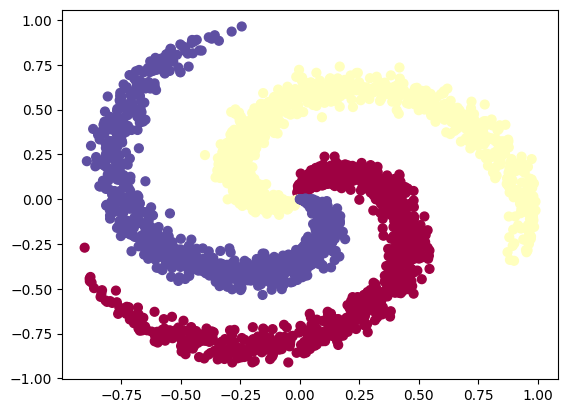

In [20]:
# Code for creating a spiral dataset from CS231n
import numpy as np
N = 1000 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()


In [38]:
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.int64)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

<ipython-input-38-8e88bc76fe39>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X, dtype=torch.float32)
<ipython-input-38-8e88bc76fe39>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y, dtype=torch.int64)


In [41]:
class ModelEx7(torch.nn.Module):
    def __init__(self):
        super(ModelEx7, self).__init__()
        self.fc1 = torch.nn.Linear(2, 10)
        self.act1 = tanh
        self.fc2 = torch.nn.Linear(10, 10)
        self.act2 = tanh
        self.fc3 = torch.nn.Linear(10, 3)
    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
        return x
loss_function = torch.nn.CrossEntropyLoss()
model = ModelEx7()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
accuracy = torchmetrics.classification.Accuracy(task="multiclass", num_classes=3)

# one_hot_train = torch.nn.functional.one_hot(y_train.to(torch.int64), num_classes=3)
# one_hot_test = torch.nn.functional.one_hot(y_test.to(torch.int64), num_classes=3)

for epoch in range(200):
    optimizer.zero_grad()
    y_train_pred = model(X_train)
    y_test_pred = model(X_test)



    train_loss = loss_function(y_train_pred, y_train)
    test_loss = loss_function(y_test_pred, y_test)

    train_loss.backward()

    if epoch % 10 == 0:
        print(f"Epoch: {epoch}")
        print(f"Train loss: {train_loss.item()}, Train accuracy: {accuracy(y_train_pred, y_train).item()}")
        print(f"Test loss: {test_loss.item()}, Test accuracy: {accuracy(y_test_pred, y_test).item()}")

    optimizer.step()


Epoch: 0
Train loss: 1.1678088903427124, Train accuracy: 0.33916667103767395
Test loss: 1.1696662902832031, Test accuracy: 0.3100000023841858
Epoch: 10
Train loss: 0.989310085773468, Train accuracy: 0.5049999952316284
Test loss: 0.9884319305419922, Test accuracy: 0.5083333253860474
Epoch: 20
Train loss: 0.8807803392410278, Train accuracy: 0.53125
Test loss: 0.878919780254364, Test accuracy: 0.5400000214576721
Epoch: 30
Train loss: 0.7848483920097351, Train accuracy: 0.5362499952316284
Test loss: 0.7923544049263, Test accuracy: 0.5316666960716248
Epoch: 40
Train loss: 0.740587592124939, Train accuracy: 0.5454166531562805
Test loss: 0.761172354221344, Test accuracy: 0.5350000262260437
Epoch: 50
Train loss: 0.7261287569999695, Train accuracy: 0.550000011920929
Test loss: 0.7493935227394104, Test accuracy: 0.5366666913032532
Epoch: 60
Train loss: 0.7037581205368042, Train accuracy: 0.5583333373069763
Test loss: 0.721300482749939, Test accuracy: 0.5550000071525574
Epoch: 70
Train loss: 0.67

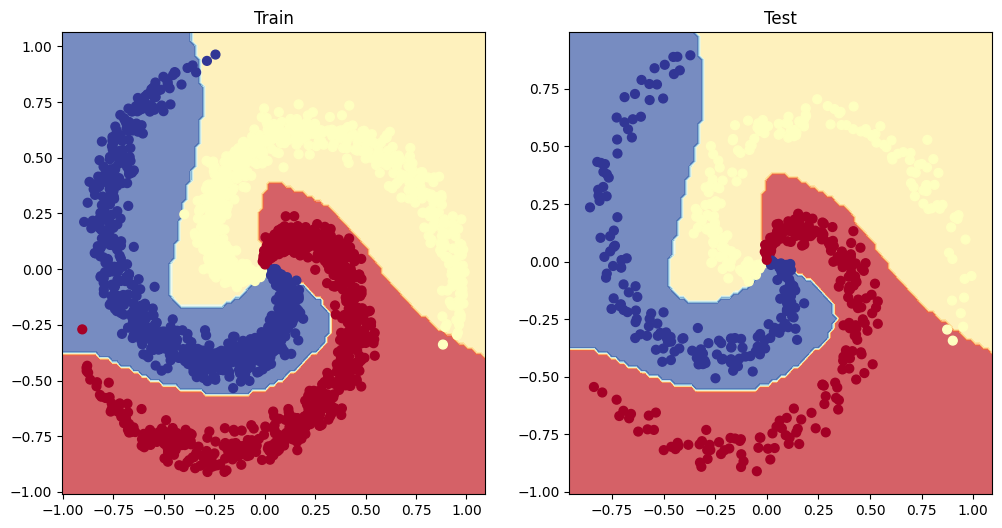

In [42]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, X_test, y_test)

In [34]:
model(X_train)

tensor([[ 7.0706, -3.4298, -2.0488],
        [ 6.5465, -3.3620, -1.4681],
        [10.6041, -4.0013, -0.0909],
        ...,
        [-0.2363,  8.2496, -7.2721],
        [-2.3370,  9.2612, -6.5523],
        [ 7.4016, -3.4771, -2.2690]], grad_fn=<AddmmBackward0>)

In [36]:
y_train.type(torch.LongTensor)

tensor([0, 0, 0,  ..., 1, 1, 0])

In [37]:
y_train

tensor([0., 0., 0.,  ..., 1., 1., 0.])